## PLS  (Kısmi En Küçük Kareler Regresyonu) Modeli

### Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"] 
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, ms[["League_N", "Division_W", "NewLeague_N"]]], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [3]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [4]:
pls_model = PLSRegression().fit(X_train, y_train)

In [5]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [6]:
pls_model = PLSRegression(n_components= 2).fit(X_train, y_train)

In [7]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

### TAHMİN

In [8]:
pls_model 

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [9]:
pls_model.predict(X_train)[0: 10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [10]:
# Eğitim Hatası

In [11]:
y_pred = pls_model.predict(X_train)

In [12]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [13]:
r2_score(y_train, y_pred)

0.5140424486535482

In [14]:
# Test Hatası

In [15]:
y_pred = pls_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

In [17]:
r2_score(y_test, y_pred)

0.2678940112232917

## Model Tuning 

In [18]:
from sklearn import model_selection

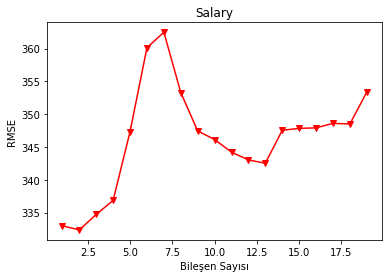

In [19]:
# CV
cv_10 = model_selection.KFold(n_splits= 10, shuffle= True, random_state= 1)

# Hata hesaplamak için döngü:
RMSE = [] # Root Mean Square Error(Hata Kareler Ortalamasının Karekökü)
for i in np.arange(1, X_train.shape[1] + 1):
    
    pls = PLSRegression(n_components= i)
    score = np.sqrt(-1* cross_val_score(pls, X_train, y_train, cv= cv_10, scoring= "neg_mean_squared_error").mean())
    RMSE.append(score)
    
# Sonuçların Görselleştirilmesi 
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), "-v", c= "r")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Salary");

In [20]:
pls_model = PLSRegression(n_components= 2).fit(X_train, y_train)

In [21]:
y_pred = pls_model.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

In [23]:
y_pred = pls_model.predict(X_train)

In [24]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696